A)

In [1]:
# read file
with open('Q1/graph1.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

In [2]:
graph = {}
num_nodes = 0
num_edges = 0
for s, d in edges:
    if s not in graph:
        num_nodes += 1
        graph[s] = []
    if d not in graph:
        num_nodes += 1
        graph[d] = []

    num_edges += 1
    graph[s].append(d)
    graph[d].append(s)


In [3]:
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 3718
Number of edges: 91723


B)

In [4]:
import random


def generate_erdos_renyi_graph(num_nodes, num_edges, p):
    graph = {node: [] for node in range(num_nodes)}
    count = 0

    while count < num_nodes:
        for i in range(num_nodes):
            for j in range(i + 1, num_nodes):
                if random.random() < p and count < num_edges and j not in graph[i]:
                    graph[i].append(j)
                    graph[j].append(i)
                    count += 1

    return graph

In [5]:
graph_erdos_renyi = generate_erdos_renyi_graph(num_nodes, num_edges, 0.2)

C)

In [6]:
def generate_small_world_graph(num_vertices, num_edges, rewiring_probability):
    count = 0
    if num_edges < num_vertices:
        raise ValueError("The number of edges should be greater than or equal to the number of vertices.")

    k = num_edges // num_vertices
    graph = {node: [] for node in range(num_vertices)}

    for i in range(num_vertices):
        for j in range(0, k):
            neighbor = (i + j) % num_vertices
            if neighbor not in graph[i] and i not in graph[neighbor] and i != neighbor:
                graph[i].append(neighbor)
                graph[neighbor].append(i)
                count += 1

    for i in graph.keys():
        for j in graph[i]:
            if random.random() < rewiring_probability:
                new_neighbor = random.randint(0, num_vertices - 1)
                if new_neighbor != i:
                    graph[i].remove(j)
                    graph[j].remove(i)
                    graph[i].append(new_neighbor)
                    graph[new_neighbor].append(i)

    diff = num_edges - count
    while diff > 0:
        new_neighbor1 = random.randint(0, num_vertices - 1)
        new_neighbor2 = random.randint(0, num_vertices - 1)
        if new_neighbor2 not in graph[new_neighbor1]:
            graph[new_neighbor2].append(new_neighbor1)
            graph[new_neighbor1].append(new_neighbor2)

            count += 1
            diff -= 1
    return graph

In [7]:

sw_graph = generate_small_world_graph(num_nodes, num_edges, 0.2)

D)

In [8]:
def degree_distribution(graph):
    degrees = {}

    for i in graph.keys():
        degrees[i] = len(graph[i])

    return degrees

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def plot_degree_distribution(graph, type):
    out_degrees = degree_distribution(graph)
    pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
    uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))

    # counting frequency of each outdegree values
    out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]

    x = np.asarray(uq_pos_out_degree_vals, dtype=float)
    y = np.asarray(out_hist, dtype=float)

    logx = np.log10(x)
    logy = np.log10(y)

    plt.figure(figsize=(10, 10))
    plt.xlim(min(logx), max(logx))
    plt.xlabel('log10 (Degree)')
    plt.ylabel('log10 (Number of nodes)')
    plt.title('Degree Distribution of ' + type)
    out_degree_dist = plt.plot(logx, logy, 'o')


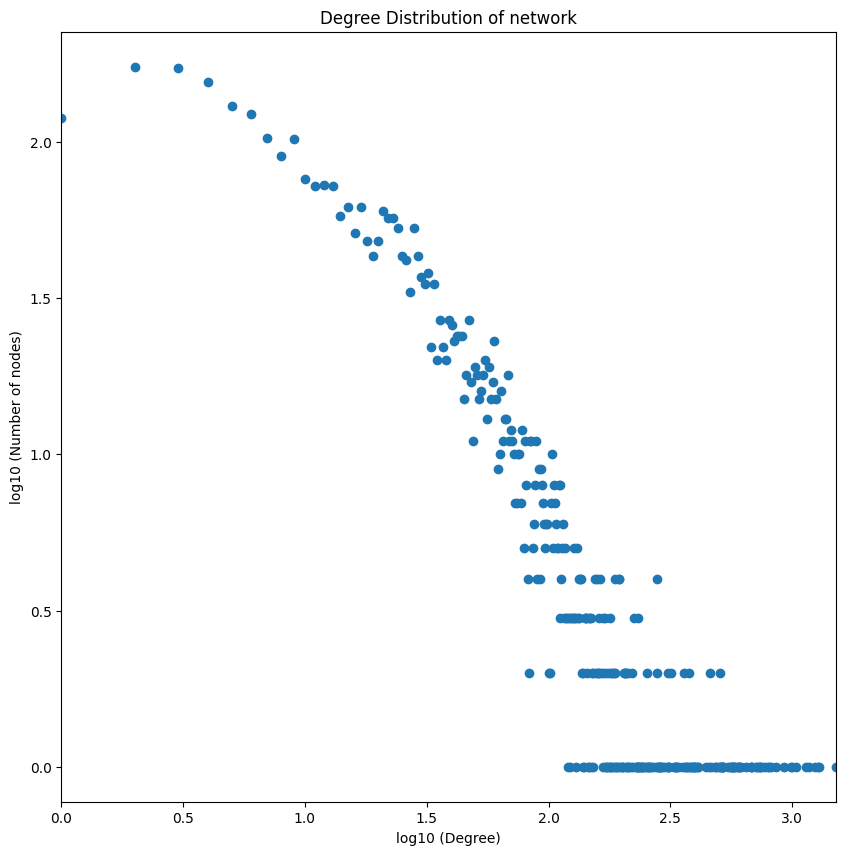

In [10]:
plot_degree_distribution(graph, "network")

In [11]:
def generate_degree_distribution_all_graphs(path):
    with open(path, 'r') as file:
        edges = [tuple(map(int, line.strip().split())) for line in file]

    graph = {}
    num_nodes = 0
    num_edges = 0

    for s, d in edges:
        if s not in graph:
            num_nodes += 1
            graph[s] = []
        if d not in graph:
            num_nodes += 1
            graph[d] = []

        num_edges += 1
        graph[s].append(d)
        graph[d].append(s)

    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")

    plot_degree_distribution(graph, "input graph")

    graph_erdos_renyi = generate_erdos_renyi_graph(num_nodes, num_edges, 0.2)
    plot_degree_distribution(graph_erdos_renyi, "erdos-renyi graph")

    graph_small_world = generate_small_world_graph(num_nodes, num_edges, 0.2)
    plot_degree_distribution(graph_small_world, "small-world graph")

Number of nodes: 3718
Number of edges: 91723


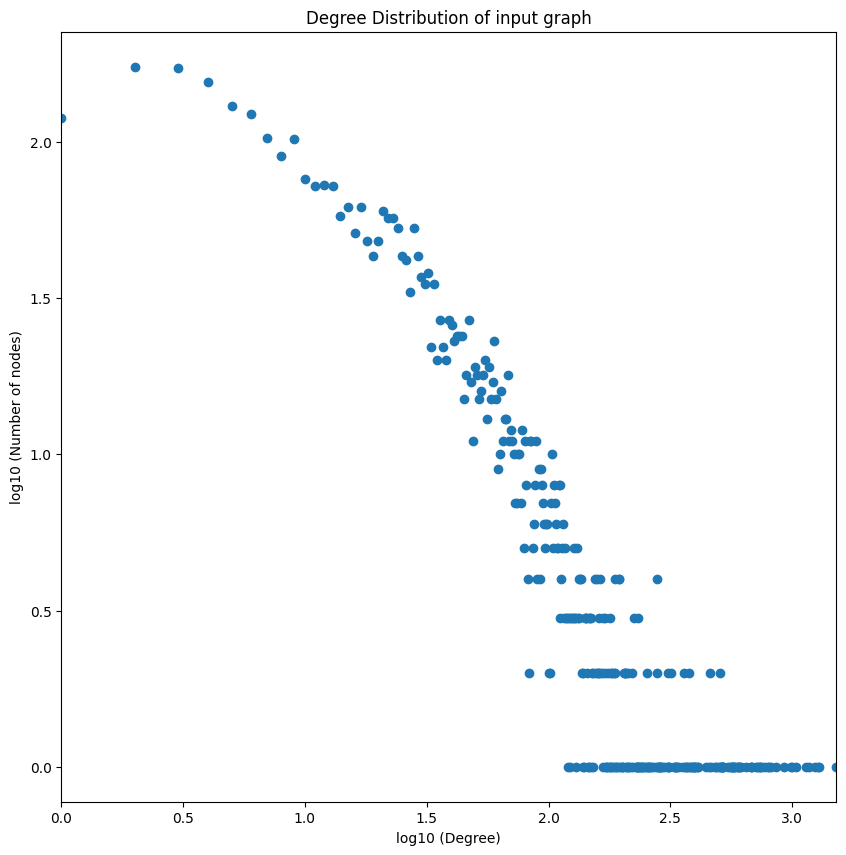

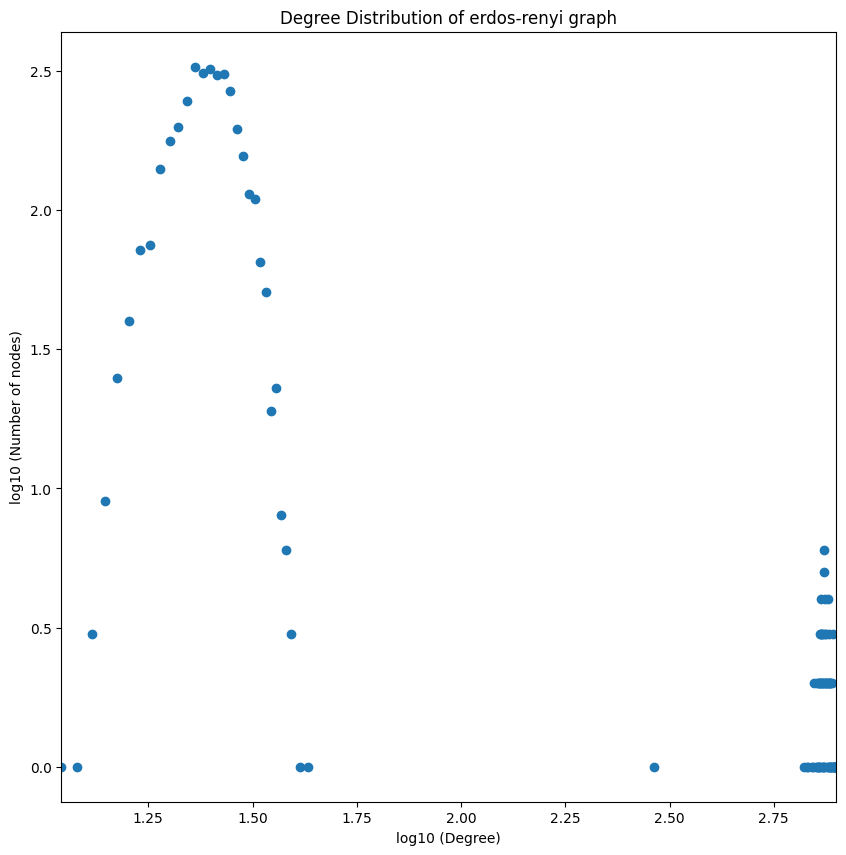

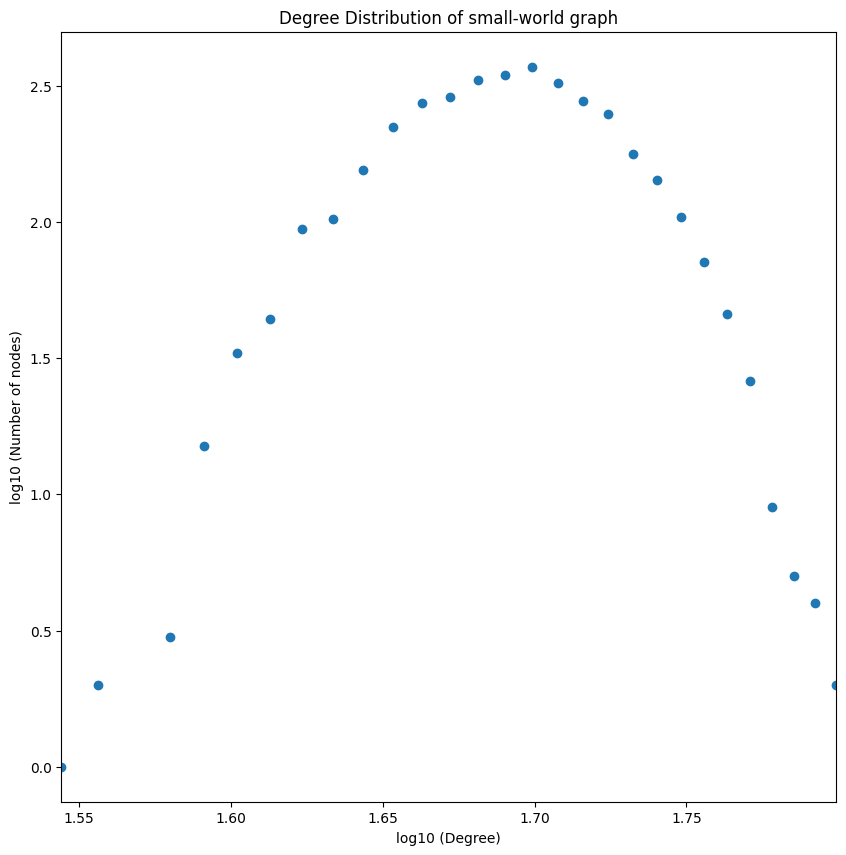

In [12]:
generate_degree_distribution_all_graphs('Q1/graph1.txt')

Number of nodes: 7886
Number of edges: 28767


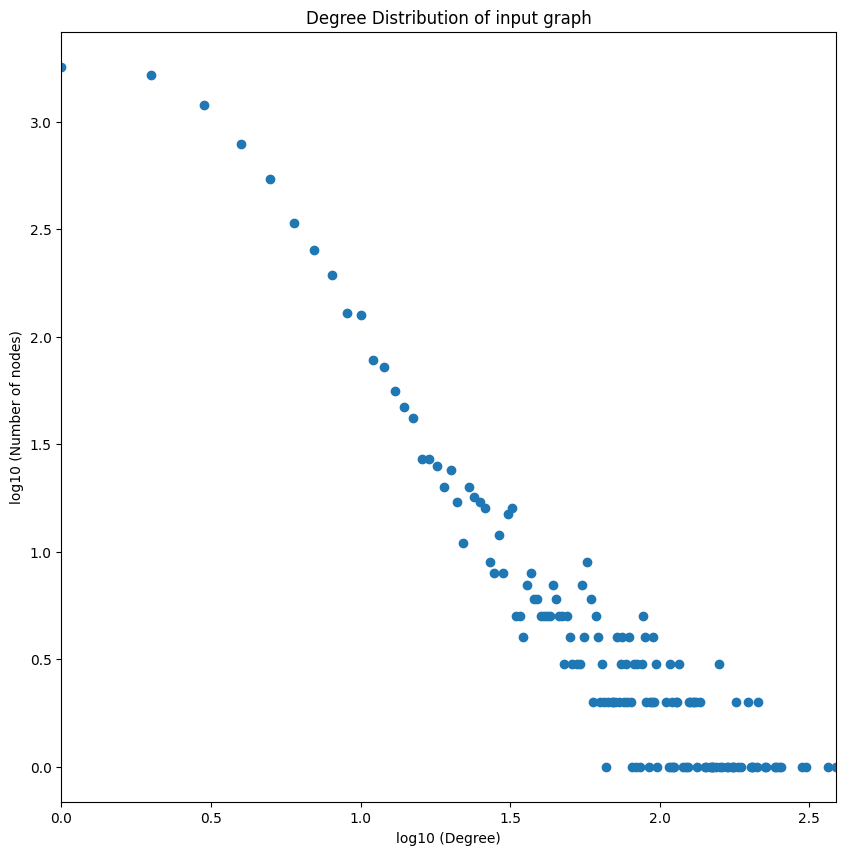

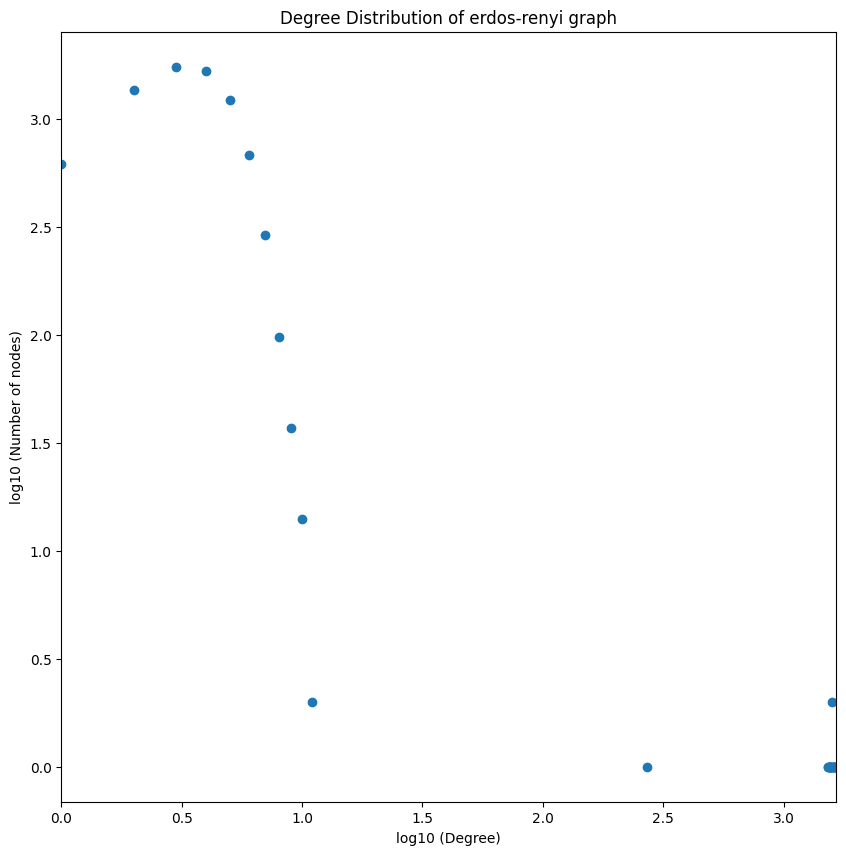

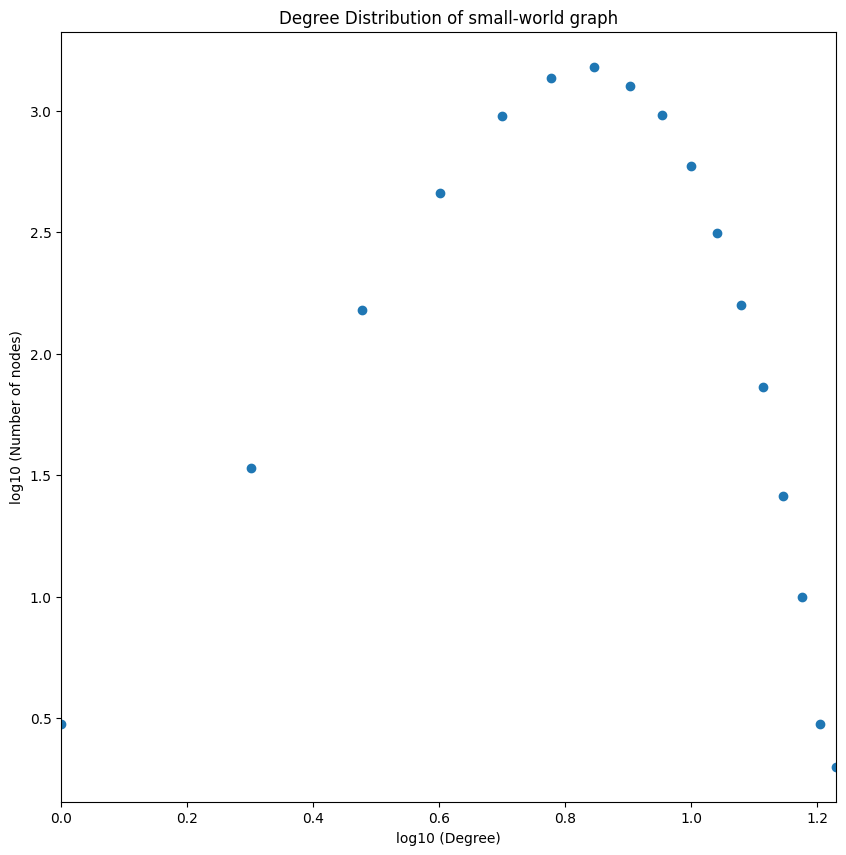

In [13]:
generate_degree_distribution_all_graphs('Q1/graph2.txt')

Number of nodes: 2708
Number of edges: 5429


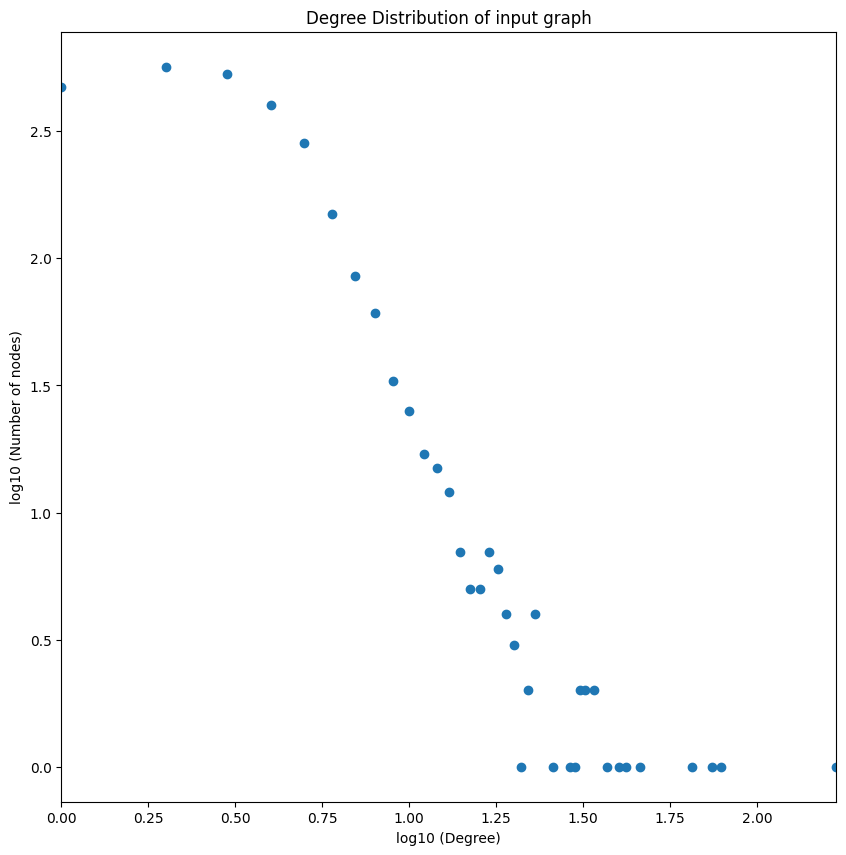

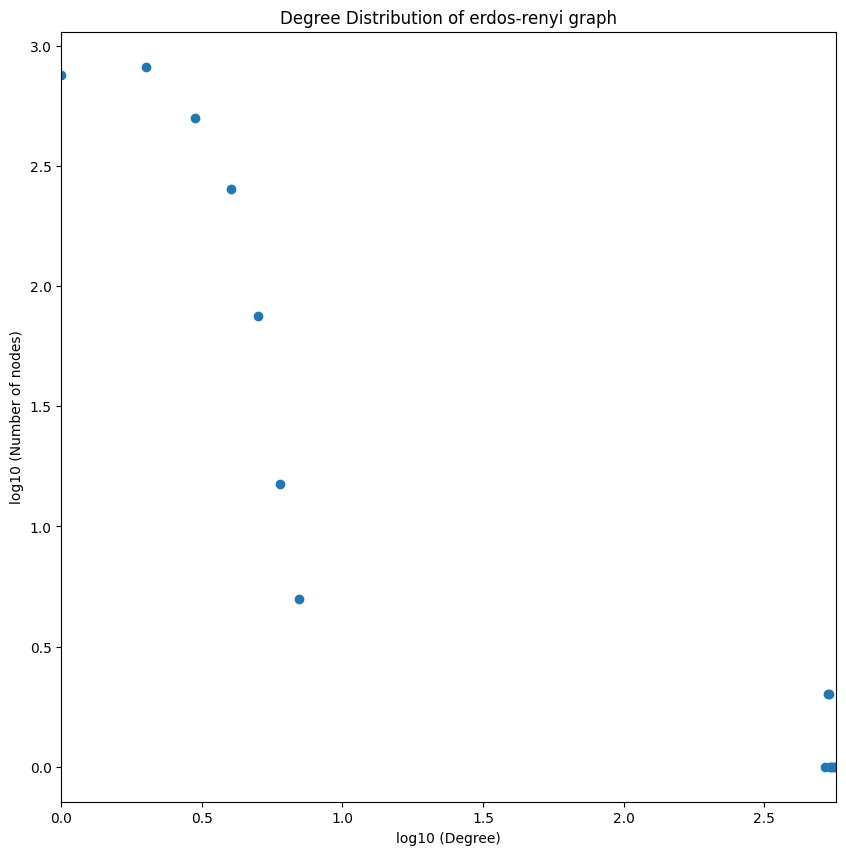

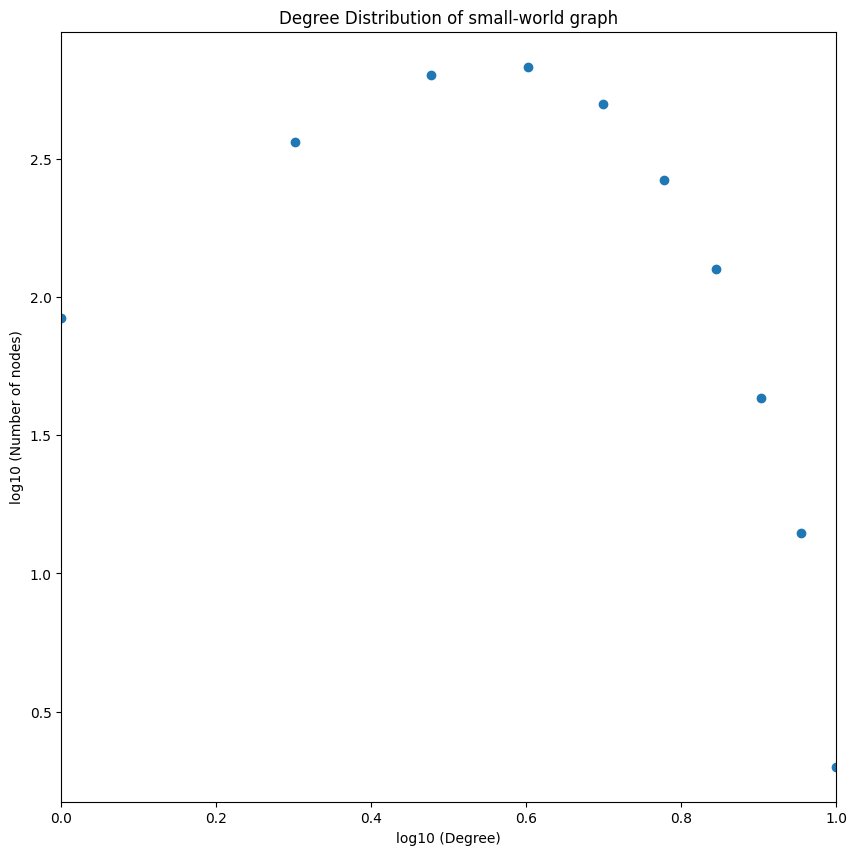

In [14]:
generate_degree_distribution_all_graphs('Q1/graph3.txt')

E)

In [21]:
def dfs(graph, node, visited, component):
    visited[node] = True
    component.append(node)
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited, component)

In [22]:
def find_giant_component(graph):
    visited = {node: False for node in graph.keys()}
    giant_components = []

    for node in graph.keys():
        if not visited[node]:
            component = []
            dfs(graph, node, visited, component)
            giant_components.append(component)

    # Find the largest component
    giant_component = max(giant_components, key=len)

    return giant_component

In [44]:
def bfs(graph, start,giant):
    visited = {}
    queue = [(start, 0)]
    visited[start] = True
    distances = {}
    distances[start] = 0

    while queue:
        node, distance = queue.pop(0)
        if node in giant and  node in graph.keys() :  #check for directed graph
            for neighbor in graph[node]:
                if  neighbor in giant and neighbor not in visited.keys():
                    visited[neighbor] = True
                    distances[neighbor] = distance + 1
                    queue.append((neighbor, distance + 1))

    return distances

In [45]:

def average_path_length_and_diameter(graph, giant):
    total_path_length = 0
    diameter = 0

    for i in giant:
        distances = bfs(graph, i,giant)

        total_path_length += sum(distances.values())
        max_distance = max(distances.values())
        diameter = max(diameter, max_distance)

    if len(giant) == 1:
        average_length = 0
    else:
        average_length = total_path_length / (len(giant) * (len(giant) - 1))

    return average_length, diameter

In [56]:
def transpose_graph(graph):
    transposed = {}
    for node in graph.keys():
        for target in graph[node]:
            if target not in transposed.keys():
                transposed[target] = [node]
            else:
                transposed[target].append(node)
    return transposed


def dfs_first_pass(graph, node, visited, stack):
    visited[node] = True
    if node in graph:
     for target in graph[node]:
        if not visited[node]:
            dfs_first_pass(graph, target, visited, stack)
     stack.add(node)


def dfs_second_pass(graph, node, visited, component):
    visited[node] = True
    if node in graph:
     for target in graph[node]:
        if target in visited and  not visited[target]:
            dfs_second_pass(graph, target, visited, component)
     component.add(node)

def kosaraju_scc(graph):
    stack = set()
    visited = {node: False for node in graph.keys()}

    # First pass: Perform DFS on the original graph and fill the stack
    for node in graph.keys():
        if not visited[node]:
            dfs_first_pass(graph, node, visited, stack)

    # Transpose the graph
    transposed_graph = transpose_graph(graph)

    # Reset visited flags
    visited = {node: False for node in transposed_graph.keys()}

    # Second pass: Perform DFS on the transposed graph and find SCCs
    strongly_connected_components = []
    while stack:
        node = stack.pop()
        if node in visited and not visited[node]:
            component = set()
            dfs_second_pass(transposed_graph, node, visited, component)
            strongly_connected_components.append(component)

    return strongly_connected_components

In [57]:
def get_directed_undirected_graph(path):
    directed_graph = {}
    undirected_graph = {}
    num_nodes = 0

    with open(path, 'r') as file:
        edges = [tuple(map(int, line.strip().split())) for line in file]

    for s, d in edges:
        if s not in undirected_graph:
            num_nodes += 1
            undirected_graph[s] = []
        if d not in undirected_graph:
            num_nodes += 1
            undirected_graph[d] = []
        if s not in directed_graph:
            directed_graph[s]=[]
            
        directed_graph[s].append(d)
        undirected_graph[s].append(d)
        undirected_graph[d].append(s)

    return directed_graph, undirected_graph

Graph1

In [144]:
directed_graph, undirected_graph = get_directed_undirected_graph('Q1/graph1.txt')

giant_component = find_giant_component(undirected_graph)

average_length_n, diameter_n = average_path_length_and_diameter(undirected_graph, giant_component)
print(f'Undirected Graph:\naverage path length:{average_length_n:.5f} diameter:{diameter_n}')

Undirected Graph:
average path length:2.66217 diameter:6


In [146]:
scc = max(kosaraju_scc(directed_graph), key=len)
len(scc)

1

In [147]:
average_length_d, diameter_d = average_path_length_and_diameter(directed_graph, directed_graph.keys())
print(f'Directed Graph:\naverage path length:{average_length_d:.5f} diameter:{diameter_d}')

Directed Graph:
average path length:0.00664 diameter:1


Graph2

In [27]:
directed_graph, undirected_graph = get_directed_undirected_graph('Q1/graph2.txt')

giant_component = find_giant_component(undirected_graph)

average_length_n, diameter_n = average_path_length_and_diameter(undirected_graph, giant_component)
print(f'Undirected Graph:\naverage path length:{average_length_n:.5f} diameter:{diameter_n}')

Undirected Graph:
average path length:3.99304 diameter:8


In [150]:
scc = max(kosaraju_scc(directed_graph), key=len)
len(scc)

1

In [151]:
average_length_d, diameter_d = average_path_length_and_diameter(directed_graph, directed_graph.keys())
print(f'Directed Graph:\naverage path length:{average_length_d:.5f} diameter:{diameter_d}')

Directed Graph:
average path length:0.00046 diameter:1


Graph3

In [58]:
directed_graph, undirected_graph = get_directed_undirected_graph('Q1/graph3.txt')

giant_component = find_giant_component(undirected_graph)

average_length_n, diameter_n = average_path_length_and_diameter(undirected_graph, giant_component)
print(f'Undirected Graph:\naverage path length:{average_length_n:.5f} diameter:{diameter_n}')

Undirected Graph:
average path length:6.31100 diameter:19


In [59]:
scc = max(kosaraju_scc(directed_graph), key=len)
len(scc)

27

In [60]:
average_length_d, diameter_d = average_path_length_and_diameter(directed_graph, scc)
print(f'Directed Graph:\naverage path length:{average_length_d:.5f} diameter:{diameter_d}')

Directed Graph:
average path length:2.82051 diameter:11


F)

In [62]:
def clustering_coefficient(graph, vertex):
    neighbors = graph[vertex]
    num_neighbors = len(neighbors)

    if num_neighbors < 2:
        return 0.0

    num_connected_pairs = 0
    for i in range(num_neighbors):
        for j in range(i + 1, num_neighbors):
            if neighbors[i] in graph[neighbors[j]]:
                num_connected_pairs += 1

    return (2.0 * num_connected_pairs) / (num_neighbors * (num_neighbors - 1))

In [63]:
def average_clustering_coefficient(graph):
    num_vertices = len(graph)
    total_coefficient = 0.0

    for vertex in graph:
        total_coefficient += clustering_coefficient(graph, vertex)

    average_coefficient = total_coefficient / num_vertices
    return average_coefficient

In [64]:
def generate_clustering_coefficient_all_graphs(path):
    with open(path, 'r') as file:
        edges = [tuple(map(int, line.strip().split())) for line in file]

    graph = {}
    num_nodes = 0
    num_edges = 0

    for s, d in edges:
        if s not in graph:
            num_nodes += 1
            graph[s] = []
        if d not in graph:
            graph[d] = []

        num_edges += 1
        graph[s].append(d)
        graph[d].append(s)

    average_main = average_clustering_coefficient(graph)
    print("Average Clustering Coefficient of Input Graph:", average_main)

    graph_erdos_renyi = generate_erdos_renyi_graph(num_nodes, num_edges, 0.2)
    average_er = average_clustering_coefficient(graph_erdos_renyi)
    print("Average Clustering Coefficient of Erdos_Renyi Graph:", average_er)

    graph_small_world = generate_small_world_graph(num_nodes, num_edges, 0.2)
    average_sw = average_clustering_coefficient(graph_small_world)
    print("Average Clustering Coefficient of Small_World Graph:", average_sw)

In [65]:
generate_clustering_coefficient_all_graphs('Q1/graph1.txt')

Average Clustering Coefficient of Input Graph: 0.0
Average Clustering Coefficient of Erdos_Renyi Graph: 0.20067033512647015
Average Clustering Coefficient of Small_World Graph: 0.6163544873464555


In [66]:
generate_clustering_coefficient_all_graphs('Q1/graph2.txt')

Average Clustering Coefficient of Input Graph: 0.0
Average Clustering Coefficient of Erdos_Renyi Graph: 0.19937491873242355
Average Clustering Coefficient of Small_World Graph: 0.3673865590754754


In [67]:
generate_clustering_coefficient_all_graphs('Q1/graph3.txt')

Average Clustering Coefficient of Input Graph: 0.23772863418575124
Average Clustering Coefficient of Erdos_Renyi Graph: 0.18405811278153952
Average Clustering Coefficient of Small_World Graph: 0.1852381689355699
